# Ejemplo 1: ANOVA

In [1]:
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.datasets import load_digits 

In [2]:

# Load the digits dataset 
X, y = load_digits(return_X_y=True) 
# digitos = load_digits()
# X1= digitos.images
# plt.imshow(X1[1], cmap="gray")

# Perform univariate feature selection 
# using ANOVA F-value metric 
selector = SelectKBest(f_classif, k=16) 
X_new = selector.fit_transform(X, y) 

# Print the indices of the selected features 
print(selector.get_support(indices=True)) 

[10 13 20 21 26 28 30 33 34 36 42 43 46 58 60 61]


C:\Users\Margarita G\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 32 39] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Margarita G\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


# Ejemplo 2: ANOVA

In [3]:
# Import the necesssary libraries 
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC 
from sklearn.feature_selection import SelectKBest, f_classif 
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 

In [4]:
# Load the datasets 
iris = load_iris(as_frame=True) 
df = iris.frame 
X = df.drop(['target'], axis = 1) 
y = df['target'] 

# Split train and test datasets 
X_train, X_test, y_train, y_test = train_test_split(X, 
													y, 
													test_size=0.2, 
													random_state=42) 

# Select the best features 
selector = SelectKBest(f_classif, k=2) 
selector.fit(X_train, y_train) 

print('Number of input features:', selector.n_features_in_) 
print('Input features Names :', selector.feature_names_in_) 
print('Input features scores :', selector.scores_) 
print('Input features pvalues:', selector.pvalues_) 
print('Output features Names :', selector.get_feature_names_out()) 

X_train_selected = selector.transform(X_train) 
X_test_selected = selector.transform(X_test) 

# Train the classifier 
clf = SVC(kernel='linear', C=1, random_state=42) 
clf.fit(X_train_selected, y_train) 
# Prediction 
y_pred = clf.predict(X_test_selected) 
# Evaluation 
accuracy = accuracy_score(y_test, y_pred) 
print("\n Accuracy:", accuracy)


Number of input features: 4
Input features Names : ['sepal length (cm)' 'sepal width (cm)' 'petal length (cm)'
 'petal width (cm)']
Input features scores : [ 84.80836804  41.29284269 925.55642345 680.77560309]
Input features pvalues: [1.72477507e-23 2.69962606e-14 1.93619072e-72 3.57639330e-65]
Output features Names : ['petal length (cm)' 'petal width (cm)']

 Accuracy: 1.0


# Ejemplo 3: RFE

In [ ]:
from sklearn.datasets import load_iris 
from sklearn.feature_selection import RFECV 
from sklearn.tree import DecisionTreeClassifier 

In [5]:
# Load the iris dataset 
X, y = load_iris(return_X_y=True) 

# Create a decision tree classifier 
estimator = DecisionTreeClassifier() 

# Use RFE with cross-validation to 
# find the optimal number of features 
selector = RFECV(estimator, cv=5) 
selector = selector.fit(X, y) 

# Print the optimal number of features 
print("Optimal number of features: %d" % selector.n_features_) 

# Print the selected features 
print("Selected features: %s" % selector.support_) 


Optimal number of features: 4
Selected features: [ True  True  True  True]


# Ejemplo 4: Random forest

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

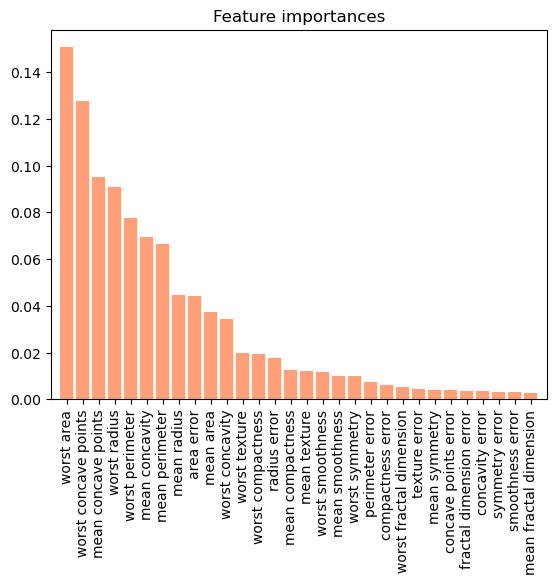

In [7]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="lightsalmon", align="center")
plt.xticks(range(X_train.shape[1]), cancer.feature_names[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [8]:
sfm = SelectFromModel(rf, threshold=0.06)
sfm.fit(X_train, y_train)
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)
rf = RandomForestClassifier(n_estimators = 100, class_weight='balanced', random_state=42)
rf.fit(X_important_train, y_train)
y_pred = rf.predict(X_important_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

